### IDs:
Insert yours IDs to the cell below

ID #1:

ID #2:


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

In [16]:
from sklearn.datasets import load_boston
from scipy import stats

X, y = load_boston(return_X_y=True)

print(X.shape)


(506, 13)


1. Contains 506 samples. with 13 featuers. Each feature is a floating point.
2. histogram and a boxplot of the nitric oxides concentration.

Text(0, 0.5, 'Frequency')

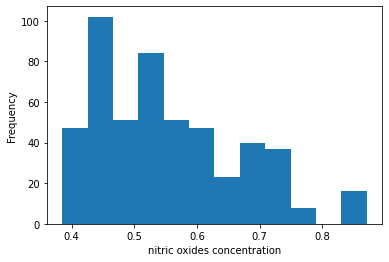

In [38]:
import numpy as np
import matplotlib.pyplot as plt
plt.hist(X[:,4], bins='auto')
plt.xlabel('nitric oxides concentration')
plt.ylabel('Frequency')
plt.title('Histogram of nitric oxides concentration')


{'whiskers': [<matplotlib.lines.Line2D at 0x112050748>,
 'caps': [<matplotlib.lines.Line2D at 0x112050e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x112050438>],
 'medians': [<matplotlib.lines.Line2D at 0x11205d588>],
 'fliers': [<matplotlib.lines.Line2D at 0x11205d908>],
 'means': []}

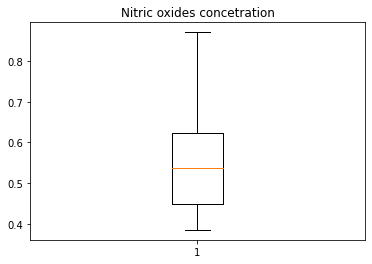

In [39]:
import pandas as pd
import seaborn as sns
fig1, ax1 = plt.subplots()
ax1.set_title('Nitric oxides concetration')
ax1.boxplot(X[:,4])

In [85]:
correlation_matrix = np.corrcoef(X.T)
# ignoring the correlation of a feature with itself

for i in range(correlation_matrix.shape[0]):
    correlation_matrix[i,i] = 0
    
idx_max = np.unravel_index(np.argmax(correlation_matrix, axis=None), correlation_matrix.shape)
idx_max
correlation_matrix[idx_max[0], idx_max[1]]


0.9102281885331835

In [87]:
idx_min = np.unravel_index(np.argmin(correlation_matrix, axis=None), correlation_matrix.shape)
idx_min
# correlation_matrix[idx_min[0], idx_min[1]]

(4, 7)

there are some very coorelated features, for instance, the example above shows that the following attributes (unsurprisingly) are very coorelated. 

RAD index of accessibility to radial highways
TAX full-value property-tax rate per $10,000

An interesting finding, is that the smallest correlation, i.e is closer to negative linear corralation than not, is between the following attributes:
nitric oxides concentration
weighted distances to five Boston employment centres

Which makes a lot of sense that as you get further from employment center the air polution will decrease

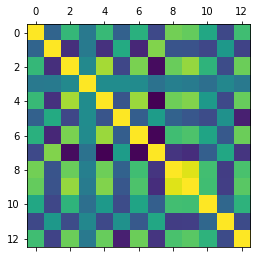

In [84]:
corrMat =np.corrcoef(X.transpose())
plt.matshow(corrMat)
plt.show()

After looking at the confusion matrix, we found out that feature 3 ( Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
which a

### Question 2 - Independence and conditional independence

#### 2.A
Can we define a three dimensional multivariate gaussian that is pairwise-independent but not collectivley independent?
If your anser is yes, provide an example.
If your answer is no, provide a proof.

Suppose that X,Y are independnt multivariate gaussians with expetency $\mu_1, \mu_2$ and 
$\Sigma_1, \Sigma_2$ covariance matrices. 
We know from class that Z = X + Y is also a gaussian multivariate since you can express it with the equation that defines gaussian multivarite. 

Now: 

$P(X,Y) = P(X)\cdot P(Y)$ and 

$P(X,Z) = P(X, X + Y) = P(X) \cdot P(X + Y | X) = P(X) \cdot P(Y) \Rightarrow P(X,Z) = P(X) \cdot P(Y)$


So X, Z are pairwise independent since the probability of $P(X,Z) = P(X) \cdot P(Y) $

But 
$P(X,Y,Z)$ is not pairwize independent since X,Y defines Z, so 
$P(X,Y,Z) \neq P(X)\cdot P(Y)\cdot P(Z)$


#### 2.B
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

There are $n\cdot m \cdot k$ possible triplets $(x_1,y_1,z_1)$ , so the number of parameters is $n\cdot m \cdot k -1$

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

Since they are independent then parameters of R.V by itself deinfes the joint distribution.

So the answer is $n + m + k$


#### 2.D
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

Under k different values we only need to learn $(n+m)\cdot k$

#### 2.E
For the random variables from the previous section, let $n=m=2$ and $k=2$. Give and example for a joint distribution of $\ X, Y \ $ and $Z$ where $X$ and $Y$ are conditionaly independent given $Z$?

### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD_2021.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3\ \ $. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

#### 3.C
Describe two ways for generating data for a GMD random variable with:
* centers at  $\mu_1+3, \mu_2+5, mu_3+7$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$

#### 3.D
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


#### 3.E - BONUS
Use the other one to generate 1000 more points and draw two comparative histograms.


### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 70,000 RCU and a standard deviation of 30,000 RCU.

#### 4.A
What percent of people earn less than 50,000 RCU?

#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

#### 4.C
What percent of people earn more than 70,000 RCU?

#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

#### 4.E
A survey is performed on employees of the company. The employees are split into 20 groups of 50 employees each.
What is the probability that more than 10 groups have an average salary between 50,000 RCU and 70,000 RCU?

### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

#### 5.B
Write code to compute the exact value of $V(T_{N})$

#### 5.C
Write code to exactly compute $P(T_{20}>40)$

#### 5.D
Use Chebicheff to provide a bound for the probability from C and compare the results